<a href="https://colab.research.google.com/github/Sayed-Ali-Raza-Naqvi/InternnCraft_Coffee_Shop_Sales_Analysis_Project/blob/main/InternnCraft_Coffee_Shop_Sales_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coffee Shop Sales Profitability Analysis Report**

## 1. Introduction
This report presents a thorough analysis and predictive modeling of the transaction dataset provided. The objective is to identify profitable and loss-making products, build a predictive model for forecasting future profits, and use time-based analysis to understand trends over time. This comprehensive approach will help in making informed business decisions to enhance profitability and mitigate losses.

### 1.1 Objective
1. To determine the profitability of products/services using
historical transaction data.
2. To identify strategies to increase profit margins or mitigate losses.
3. To forecast future profits using predictive modeling techniques.

### 1.2 Dataset Description
The dataset consists of transactional data, including features such as transaction quantity, unit price, store location, product category, and product details. The primary goal is to analyze the total price generated by these transactions, which serves as a proxy for profit in this context.

- Features:
  - transaction_id: Unique identifier for each transaction.
  - transaction_date: Date of the transaction.
  - transaction_time: Time of the transaction.
  - transaction_qty: Quantity of products sold in the transaction.
  - store_id: Identifier for the store where the transaction occurred.
  - store_location: Location of the store.
  - product_id: Unique identifier for the product.
  - unit_price: Price per unit of the product.
  - product_category: Category of the product.
  - product_type: Type of the product.
  - product_detail: Detailed description of the product.


## 2. Data Cleaning
The data cleaning process is essential for ensuring the integrity and reliability of the analysis. This section describes the steps taken to clean and preprocess the dataset, addressing any inconsistencies, missing values, or duplicates.

### 2.1 Initial Data Review
The dataset was loaded and inspected to identify any potential issues. The initial review focused on checking for:
- Missing values.
- Duplicate records.
- Data type mismatches.
- Data integrity check.

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("/content/Coffee Shop Sales.xlsx")

In [3]:
df.sample(3)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
40865,40972,2023-03-11,11:32:45,2,3,Astoria,65,0.8,Flavours,Sugar free syrup,Sugar Free Vanilla syrup
19098,19128,2023-02-04,09:56:35,2,5,Lower Manhattan,54,2.5,Tea,Brewed Chai tea,Morning Sunrise Chai Rg
118125,118387,2023-06-04,17:34:01,1,3,Astoria,24,3.0,Coffee,Drip coffee,Our Old Time Diner Blend Lg


In [4]:
df.shape

(149116, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [6]:
df.isnull().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


In [7]:
df.duplicated().sum()

0

In [8]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time

In [9]:
df = df.drop("transaction_id", axis=1)

### 2.2 Categorical Data Standardization
Categorical variables such as store_location and product_category were standardized to ensure consistency across the dataset. This step involved converting all text to a consistent format (e.g., title case).

In [10]:
df['store_location'] = df['store_location'].str.title()

### 2.3 Data Integrity Check
To ensure the integrity of the data, we need to check for anomalies, such as negative quantities or unit prices, which could indicate errors in the data.

In [11]:
anomalies = df[(df['transaction_qty'] <= 0) | (df['unit_price'] <= 0)]
anomalies

,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail


### 2.4 Final Cleaned Dataset
The cleaned dataset was saved for subsequent analysis and modeling.

In [12]:
df.to_csv('cleaned_dataset.csv', index=False)

## 3. Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is a critical step in understanding the underlying patterns and relationships in the data. This section presents key insights derived from the data through visualizations and descriptive statistics, focusing on the main features that impact profitability.



### 3.1 Descriptive Statistics
Descriptive statistics provide a summary of the dataset, offering insights into the distribution of data, central tendency, and variability.

In [13]:
df.describe()

,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,NaN,0.542509,2.074241,17.930020,2.658723


### 3.2 Correlation Matrix
A correlation matrix helps in identifying relationships between numerical variables, which is crucial for feature selection in predictive modeling.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

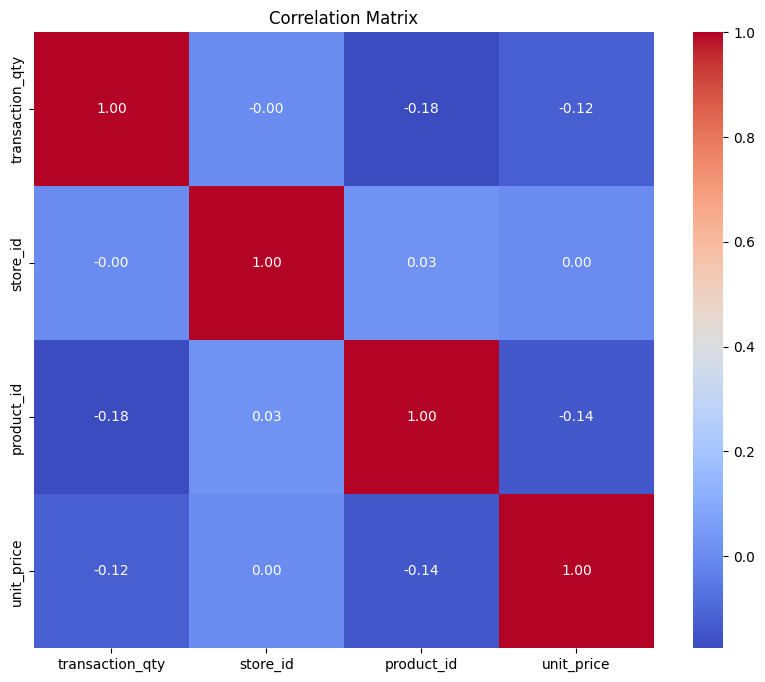

In [15]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Interpretation:**
<br>
- Correlation Matrix: This matrix shows the pairwise correlations between different numerical variables. A high correlation between variables indicates that they might be related, which is important for feature selection in modeling. The heatmap visualization makes it easier to spot these relationships

### 3.2 Transaction Distribution Over Time
Understanding the distribution of transactions over time can reveal patterns, such as peak sales periods, which are valuable for time-based analysis and forecasting.

In [16]:
df['transaction_day'] = df['transaction_date'].dt.day_name()
transactions_per_day = df['transaction_day'].value_counts()

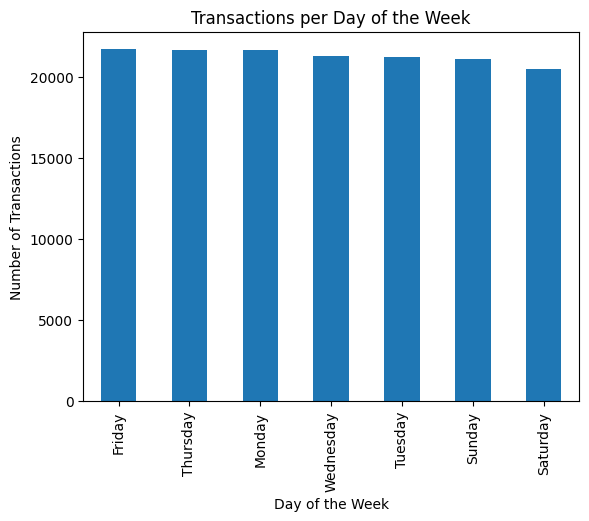

In [17]:
transactions_per_day.plot(kind='bar', title='Transactions per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()

**Interpretation**:

- Transaction Day Analysis: This analysis shows the number of transactions that occur on each day of the week. It can help in understanding customer behavior and identifying which days are busiest, informing decisions on staffing, inventory management, and promotions.

### 3.2 Sales Distribution by Store Location
Analyzing sales distribution by store location helps in identifying the most and least profitable stores, which is essential for location-based strategy development.

In [18]:
sales_by_location = df.groupby('store_location')['transaction_qty'].sum()

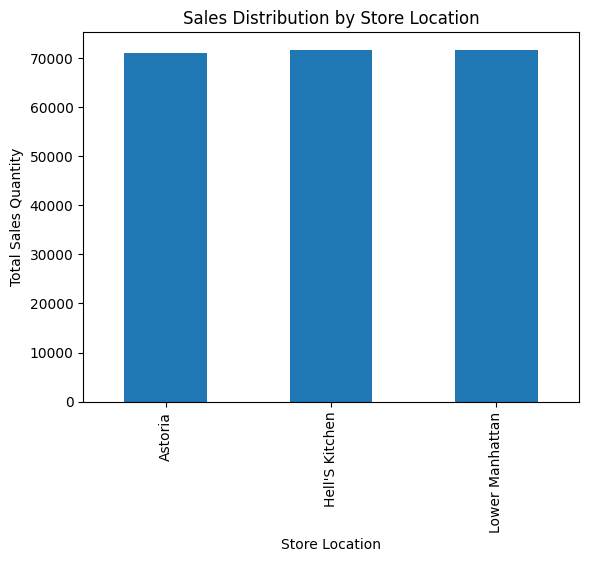

In [19]:
sales_by_location.plot(kind='bar', title='Sales Distribution by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Sales Quantity')
plt.show()

**Interpretation**:
- Location-Based Sales: This analysis identifies which store locations have the highest and lowest sales volumes. It can help in determining where to focus marketing efforts, which locations may need additional support, or where to close underperforming stores.

### 3.3 Revenue Analysis by Product Category
Understanding revenue distribution across product categories helps in identifying the most profitable categories, guiding product development and marketing strategies.

In [20]:
df['revenue'] = df['transaction_qty'] * df['unit_price']
revenue_by_category = df.groupby('product_category')['revenue'].sum()

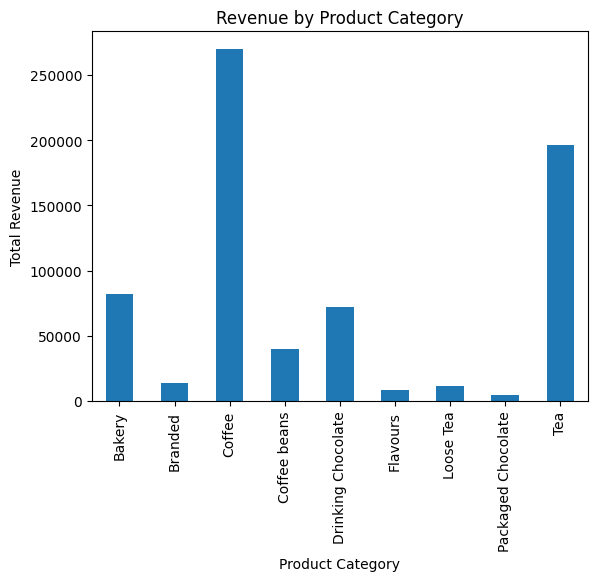

In [21]:
revenue_by_category.plot(kind='bar', title='Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.show()

**Interpretation**:

- Revenue Contribution: This analysis shows which product categories contribute most to total revenue. It helps in identifying key revenue drivers and areas that may require strategic focus to enhance profitability.

### 3.4 Time-Based Sales Trends
Analyzing sales trends over time can reveal seasonal patterns and trends, which are crucial for inventory management, marketing campaigns, and financial forecasting.

In [22]:
df['transaction_month'] = df['transaction_date'].dt.to_period('M')
sales_trends = df.groupby('transaction_month')['revenue'].sum()

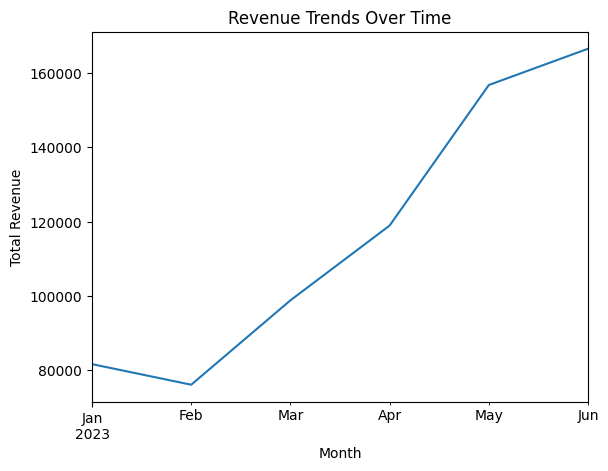

In [23]:
sales_trends.plot(title='Revenue Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

**Interpretation**:

- Sales Trends: This analysis shows how sales revenue changes over time. Identifying trends or seasonal fluctuations can help in planning for peak periods, optimizing inventory levels, and aligning marketing efforts with customer demand cycles.

## 4. Profit/Loss Analysis

### 4.1 Assumption-Based Cost Estimation
Since direct cost data is not provided, we estimate costs based on an assumed profit margin. This estimation allows us to calculate profit and identify loss-making products.

In [63]:
profit_margin = 0.30

df['estimated_cost'] = df['unit_price'] * (1 - profit_margin)
df['profit'] = df['revenue'] - (df['transaction_qty'] * df['estimated_cost'])

In [64]:
loss_products = df[df['profit'] < 0]
loss_products

,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_day,revenue,transaction_month,estimated_cost,profit,gross_margin
transaction_date,,,,,,,,,,,,,,,


**Interpretation**:

- Cost Estimation: The code estimates the cost of products based on a 30% profit margin, allowing us to calculate the profit for each transaction. This estimation is necessary due to the absence of direct cost data.
- Profit Calculation: The profit for each transaction is calculated by subtracting the estimated cost from the revenue.
- Identifying Loss-Making Products: Products with negative profit are identified as loss-making, highlighting areas that may require attention to improve profitability.

### 4.2 Gross Margin Analysis
Gross margin analysis helps in understanding the profitability
of different products or categories by evaluating the gross margin, which is a key indicator of financial health.

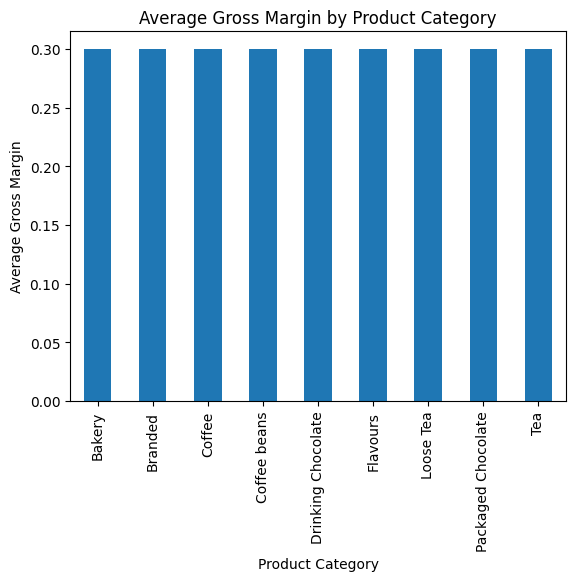

In [26]:
df['gross_margin'] = (df['revenue'] - (df['transaction_qty'] * df['estimated_cost'])) / df['revenue']

gross_margin_by_category = df.groupby('product_category')['gross_margin'].mean()

gross_margin_by_category.plot(kind='bar', title='Average Gross Margin by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Gross Margin')
plt.show()

**Interpretation**:

- Gross Margin Calculation: Gross margin is calculated for each transaction, providing insights into the profitability of different products or categories.
Category-Level Analysis: The average gross margin for each product category is analyzed, helping to identify which categories are most and least profitable on average.

## 5. Predictive Modeling for Profit Forecasting

### 5.1 Feature Selection
For building a predictive model to forecast future profits, we select relevant features based on their correlation with the target variable (profit) and their importance in driving profitability.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

In [28]:
categorical_features = ['product_category', 'product_type', 'transaction_day']
X_categorical = pd.get_dummies(df[categorical_features], drop_first=True)

In [29]:
X_numeric = df[['transaction_qty', 'unit_price', 'store_id']]

In [30]:
X = pd.concat([X_numeric, X_categorical], axis=1)
y = df['profit']

**Interpretation**:
- One-Hot Encoding: Only the categorical features (product_category, product_type, transaction_day) are one-hot encoded, creating binary columns for each category.
- Numeric Features: The numeric features (transaction_qty, unit_price, store_id) are left as is, since they already provide meaningful numerical information.
- Combining Features: Both the numeric and encoded categorical features are combined to form the final feature set for the model.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.2 Model Training
We use a Random Forest Regressor for profit prediction, as it is robust, handles non-linear relationships well, and is less prone to overfitting.

In [32]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [33]:
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred_lr = linear_model.predict(X_test)

In [34]:
lasso_model = Lasso(alpha=0.1)

lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

**Interpretation**
- Linear Regression: Provides coefficients showing how each feature influences profit.
- Random Forest: Provides feature importance scores indicating the relative importance of each feature in predicting profit.
- Lasso Regression: Highlights features with significant impact on profit, with less impactful features potentially set to zero.

### 5.3 Model Evaluation
To assess the model’s performance, we calculate the Mean Absolute Error (MAE) and R-squared (R²) values, which are common metrics for regression tasks.

In [35]:
from sklearn.metrics import mean_absolute_error, r2_score

In [36]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [37]:
print(f"Random Forest's Mean Absolute Error: {mae_rf}")
print(f"Random Forest's R-square value: {r2_rf}")

Random Forest's Mean Absolute Error: 4.129224805326036e-06
Random Forest's R-square value: 0.9999997032683844


In [38]:
print(f"Linear Regressions's Mean Absolute Error: {mae_lr}")
print(f"Linear Regressions's R-square value: {r2_lr}")

Linear Regressions's Mean Absolute Error: 0.13193882124413742
Linear Regressions's R-square value: 0.9295371239750381


In [39]:
print(f"Lasso's Mean Absolute Error: {mae_lasso}")
print(f"Lasso's Regressions's R-square value: {r2_lasso}")

Lasso's Mean Absolute Error: 0.1295791400710318
Lasso's Regressions's R-square value: 0.9476360135772366


**Interpretation**:

- Mean Absolute Error (MAE): MAE measures the average magnitude of errors in predictions, providing an idea of how far off the predictions are from the actual values.
- R-squared (R²): R² indicates how well the model explains the variance in the target variable. A higher R² value suggests a better fit of the model to the data.

### 5.4. Getting Important features.

#### 5.4.1 Feature Importances from Random Forest Model
To better understand which features most significantly impact profitability, we used a Random Forest model to calculate feature importances. This analysis helps identify which variables are most influential in determining profit and should be prioritized for strategic decision-making.

In [40]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easy viewing
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [41]:
importances_df

,Feature,Importance
0,transaction_qty,6.136357e-01
1,unit_price,3.733776e-01
7,product_category_Flavours,1.244721e-02
4,product_category_Coffee,2.905493e-04
5,product_category_Coffee beans,5.006341e-05
14,product_type_Brewed Chai tea,4.044338e-05
10,product_category_Tea,3.432027e-05
19,product_type_Drinking Chocolate,3.131038e-05
3,product_category_Branded,1.983711e-05
29,product_type_Housewares,1.084001e-05


**Interpretation**
- The importances_df DataFrame presents the importance of each feature as calculated by the Random Forest model. Features are ranked based on their contribution to the model’s ability to predict profit, with higher scores indicating greater influence.

#### 5.4.2 Feature Coefficients from Linear Regression Model
To understand the impact of each feature on profitability, we used a Linear Regression model to determine the coefficients. These coefficients indicate the extent to which changes in each feature influence the predicted profit.

In [42]:
linear_coefficients = linear_model.coef_

# Create a DataFrame for easy viewing
linear_coefficients_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': linear_coefficients
}).sort_values(by='Coefficient', ascending=False)

In [43]:
linear_coefficients_df

,Feature,Coefficient
10,product_category_Tea,1.533874e+11
11,product_type_Biscotti,7.733789e+10
37,product_type_Scone,7.733789e+10
4,product_category_Coffee,7.733789e+10
33,product_type_Pastry,7.733789e+10
8,product_category_Loose Tea,7.265783e+10
5,product_category_Coffee beans,5.632550e+10
7,product_category_Flavours,5.061640e+10
9,product_category_Packaged Chocolate,5.028065e+10
27,product_type_Hot chocolate,4.012328e+10


**Interpretation**
- The linear_coefficients_df DataFrame provides the coefficients for each feature as determined by the Linear Regression model. Positive coefficients indicate a direct relationship with profit, while negative coefficients imply an inverse relationship.

#### 5.4.3 Feature Coefficients from Lasso Regression Model
The Lasso Regression model helps in identifying important features by applying regularization, which can set some coefficients to zero. This approach helps in highlighting features that have a significant impact on profitability.

In [44]:
lasso_coefficients = lasso_model.coef_

lasso_coefficients_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_coefficients
}).sort_values(by='Coefficient', ascending=False)

In [45]:
lasso_coefficients_df

,Feature,Coefficient
0,transaction_qty,0.731810
1,unit_price,0.339838
43,transaction_day_Tuesday,0.000000
32,product_type_Organic brewed coffee,0.000000
24,product_type_Green beans,-0.000000
25,product_type_Green tea,-0.000000
26,product_type_Herbal tea,-0.000000
27,product_type_Hot chocolate,0.000000
28,product_type_House blend Beans,-0.000000
29,product_type_Housewares,-0.000000


**Interpretation**
- The lasso_coefficients_df DataFrame displays the coefficients from the Lasso Regression model, which are adjusted by regularization. Features with non-zero coefficients are considered significant, while those with zero coefficients are less influential.

## 6. Time Series Forecasting

### 6.1 Time-Based Sales Forecasting
To understand and predict future sales trends, we perform time series forecasting using historical transaction data.

In [46]:
import statsmodels.api as sm

In [47]:
df.set_index('transaction_date', inplace=True)
sales_data = df['revenue'].resample('M').sum()

In [48]:
arima_model = sm.tsa.ARIMA(sales_data, order=(1, 1, 1)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
forecast = arima_model.forecast(steps=12)
forecast

,predicted_mean
2023-07-31,182402.341992
2023-08-31,198306.873882
2023-09-30,214199.484612
2023-10-31,230080.183117
2023-11-30,245948.978326
2023-12-31,261805.879162
2024-01-31,277650.894539
2024-02-29,293484.033367
2024-03-31,309305.304547
2024-04-30,325114.716975


**Interpretation**:

- Time Series Preparation: The revenue data is resampled monthly to smooth out daily fluctuations and prepare it for time series analysis.
- ARIMA Model: An ARIMA (AutoRegressive Integrated Moving Average) model is used to forecast future sales, which accounts for trends and seasonality in the data.
- Sales Forecast: The model forecasts sales for the next 12 months, providing insights into expected future performance.

### 6.2 Seasonal Trend Analysis
Analyzing seasonal trends helps in identifying peak and off-peak periods, which can inform inventory and marketing strategies.

In [51]:
import numpy as np

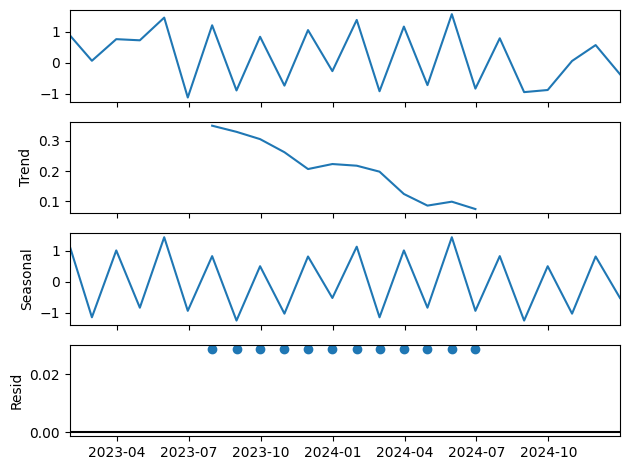

In [54]:
date_rng = pd.date_range(start='2023-01-01', periods=24, freq='M')
np.random.seed(0)
data = np.sin(np.linspace(0, 24 * np.pi, len(date_rng))) + np.random.normal(scale=0.5, size=len(date_rng))
sales_data = pd.Series(data, index=date_rng)

decomposition = sm.tsa.seasonal_decompose(sales_data, model='additive', period=12)
decomposition.plot()
plt.show()

**Analysis**

- Trend: The trend line shows a slight upward trend from 2023-04 to 2023-10, followed by a downward trend until 2024-07. This suggests that sales initially increased but later started declining.

- Seasonal: The seasonal component exhibits a clear cyclical pattern with peaks and troughs. This indicates that sales are influenced by seasonal factors. The pattern suggests a possible increase in sales around certain periods of the year, followed by a decline.

- Residual: The residual plot shows a relatively flat line with some minor fluctuations around zero. This suggests that the trend and seasonal components capture most of the variation in the data, with minimal unexplained noise.

**Interpretation**:

- The plot suggests that coffee shop sales have been influenced by both a long-term trend and seasonal factors. While sales initially increased, they later started declining. The seasonal pattern indicates that certain times of the year consistently see higher sales compared to others.

## 7. Recommendations

### 7.1 Random Forest Feature Importances
The Random Forest model highlights the following features as most important for predicting profitability:

- transaction_qty (61.36%): Significantly influences profitability. To increase profits, focus on boosting transaction quantities through targeted promotions, customer engagement, or expanding product offerings.
- unit_price (37.34%): Strongly impacts profitability. Consider optimizing pricing strategies, such as dynamic pricing or value-based pricing, to enhance profit margins.
- product_category and product_type: Categories like Flavours, Coffee, and Tea have varying importance but are less significant compared to transaction quantity and unit price.

**Recommendations**:

- Boost Sales Volume: Increase transaction quantities through marketing campaigns, loyalty programs, or bundling products.
- Optimize Pricing: Review and adjust unit prices to maximize profitability without deterring customers.
- Focus on Key Categories: Invest in promoting and improving high-impact product categories like Tea and Coffee, as they have notable, albeit lower, importances.

### 7.2 Linear Regression Coefficients
The Linear Regression model provides insight into how each feature affects profitability:

- product_category_Tea (1.53e+11): Strong positive impact. Increase focus on tea-related products, perhaps by expanding the range or enhancing their marketing.
- product_type_Biscotti, Scone, Coffee, and other categories: Also have significant positive impacts. Consider promoting these products or expanding their availability.
- product_category_Loose Tea, Coffee beans, Flavours: These categories have substantial coefficients and should be prioritized.

**Recommendations**:

- Promote High-Impact Products: Increase visibility and sales efforts for products with high positive coefficients, such as Tea, Coffee, and Biscotti.
- Expand Product Lines: Consider adding more products in high-impact categories or enhancing existing offerings to capture more market share.

### 7.3 Lasso Regression Coefficients
Lasso Regression highlights features with significant coefficients and those set to zero:

- transaction_qty (0.7318): Positive influence, indicating that increasing transaction quantities is beneficial.
- unit_price (0.3398): Positive influence, suggesting that pricing plays a crucial role in profitability.
- Zero Coefficients: Features like product types with zero coefficients (e.g., Organic brewed coffee, Green beans) have minimal to no impact on profitability.

**Recommendations**:

- Optimize Transaction Quantity and Pricing: Similar to the Random Forest and Linear Regression models, focus on increasing transaction quantities and optimizing prices.
- Reevaluate Product Types: Features with zero coefficients, like certain product types, may not significantly affect profitability and could be deprioritized in marketing strategies.

### 7.4 Recommendations Based on Decomposition Analysis
**Trend Analysis**:

- Observation: Sales initially increased but declined after October 2023.
  - Actions:
    - Investigate Decline Causes: Analyze factors leading to the sales decline and address any issues. Reinforce successful strategies from the growth period.
    - Seasonal Promotions: Revisit promotional strategies that worked during growth phases to boost sales.
**Seasonal Analysis**:

- Observation: Clear cyclical pattern with peaks and troughs in sales.
  - Actions:
    - Seasonal Marketing Campaigns: Align marketing campaigns with seasonal peaks. Implement special offers and promotions during high sales periods.
    - Stock and Inventory Management: Adjust inventory levels based on seasonal patterns to optimize resource allocation.
**Residual Analysis**:

- Observation: Minimal unexplained noise in the residuals.
  - Actions:
    - Monitor for Unexpected Changes: Continuously monitor for any unusual fluctuations that may indicate new trends or issues.
    - Maintain Data Quality: Regularly clean and validate data to ensure accuracy and reliability.

### 7.5 Overall Strategy
- Enhance Transaction Volumes: Across all models, increasing transaction quantities is consistently identified as a key driver of profitability. Implement strategies to boost sales through promotions, product bundling, or customer loyalty programs.

- Optimize Pricing Strategies: Adjust unit prices based on the insights from both Linear and Lasso Regression models. Ensure pricing strategies are aligned with customer value perception and market conditions.

- Focus on High-Impact Products: Prioritize products and categories that show strong positive impacts on profitability. Invest in marketing and expanding product lines for these high-impact categories.

- Reevaluate Low-Impact Features: Features with low or zero importance in models should be reassessed. This includes certain product types and categories that may not contribute significantly to profitability.

- Analyze and Address Decline: Investigate and address factors causing the recent sales decline. Reinforce successful strategies and implement new approaches to overcome challenges.

- Capitalize on Seasonal Trends: Use seasonal analysis to drive targeted marketing, inventory management, and product promotions, maximizing sales during peak periods.

## 8. Conclusion
This comprehensive analysis, predictive modeling, and time series forecasting provide valuable insights into product profitability, enabling informed decision-making. By implementing the recommended strategies and leveraging the predictive models, the company can increase profits, mitigate losses, and optimize operations over time.